# DIGS 20006/30006 : NLP Assignment 8

In [18]:
import gensim 
import logging

In [1]:
#HCA
import re, os, sys, platform, json
from sklearn.decomposition import PCA
from pandas import DataFrame
import numpy as np

# The components for analysis:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# The components for viz & pprint
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import matplotlib.font_manager
import matplotlib.colors

In [2]:
# Input folder
corpusFolder = "/Users/tianchushu/Desktop/NLP/corpus//"
ignoreFiles = set([".DS_Store","LICENSE","README.md"])

# The vectorizor object wants a list of texts, so we will prepare one for it
sTexts = []
sTitles = []
for root, dirs, files in os.walk(corpusFolder):
    for filename in files:
        if filename not in ignoreFiles:
            with open(os.path.join(root,filename)) as rf:
                sTexts.append(rf.read())  #.lower()
                sTitles.append(filename[:-4])

# This is where you would then manipulate your corpus if you choose:
# Remove stopwords and/or punctuation, remove common words, lowercase all, etc etc.
                
#shortTitles = for title in sTitles
#print(len(sTexts))
#pprint(sTitles)

In [3]:
# Get the frequencies of the 1000 most common TF (without IDF) [=ngrams] in the corpus 
countVectorizer = TfidfVectorizer(max_features=1000, use_idf=False) # Paul limits this to 1000 ngrams, worth playing with
countMatrix = countVectorizer.fit_transform(sTexts)

In [4]:
# We can measure the distances between all of these documents using a variety of metrics.
# There are many assumptions these distance metrics make (and some might be better than others).
similarity = euclidean_distances(countMatrix)

In [5]:
# We can group these documents together based on which ones are closest 
# together using Hierarchical Cluster Analysis. Here we use the "Ward" algorithm.
# 
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for
# documentation of other HCA models, e.g. 'single', 'complete', 'weighted', and 'median'.
linkages = linkage(similarity,'ward')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


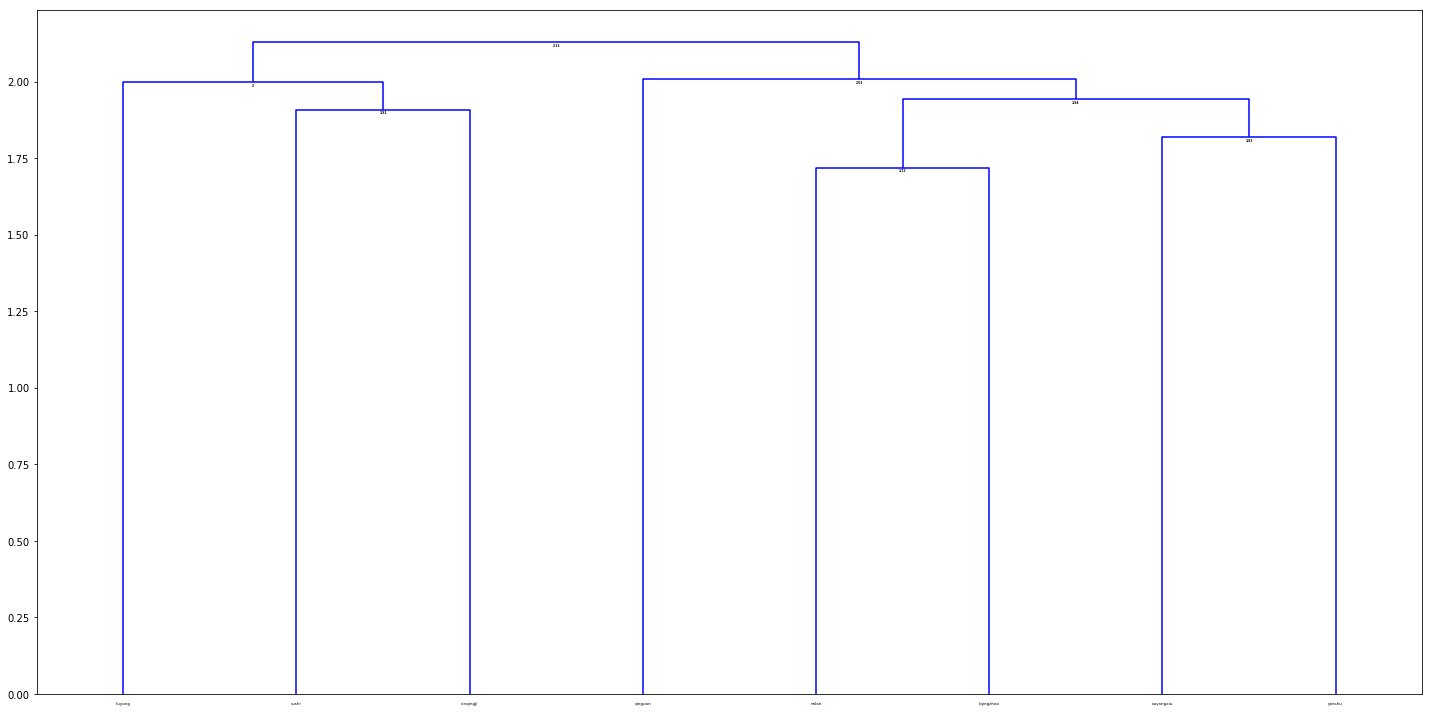

In [6]:
#1a An HCA dendrogram including similarity scores for your corpus.

f = plt.figure(figsize=(20,10))

# Here we will use scipy's dendogram function (which we imported) to plot this:
dendr = dendrogram(linkages, labels=sTitles, leaf_font_size=4) #orientation="right",

# We'll adjust the plot a bit to make it better
plt.tick_params(axis='x', which='both')  #, bottom=False, top=False, labelbottom=False)

# This will prevent the labels from going off the figure
plt.tight_layout()

for i, d in zip(dendr['icoord'], dendr['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y) #, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -1),
                         textcoords='offset points',
                         va='top', ha='center', fontsize=3, fontweight='bold')

plt.show()

f.savefig("dendrogram.pdf", bbox_inches='tight')

In [7]:
#pprint(dendr)

{'color_list': ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 1.9084420287946042, 1.9084420287946042, 0.0],
            [0.0, 1.9976681883447152, 1.9976681883447152, 1.9084420287946042],
            [0.0, 1.7185697948537784, 1.7185697948537784, 0.0],
            [0.0, 1.8195647590142523, 1.8195647590142523, 0.0],
            [1.7185697948537784,
             1.941300181101037,
             1.941300181101037,
             1.8195647590142523],
            [0.0, 2.009142306983896, 2.009142306983896, 1.941300181101037],
            [1.9976681883447152,
             2.1275177321147853,
             2.1275177321147853,
             2.009142306983896]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
            [5.0, 5.0, 20.0, 20.0],
            [45.0, 45.0, 55.0, 55.0],
            [65.0, 65.0, 75.0, 75.0],
            [50.0, 50.0, 70.0, 70.0],
            [35.0, 35.0, 60.0, 60.0],
            [12.5, 12.5, 47.5, 47.5]],
 'ivl': ['liuyong',
         'sushi',
         'xinqingji',
         'qi

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


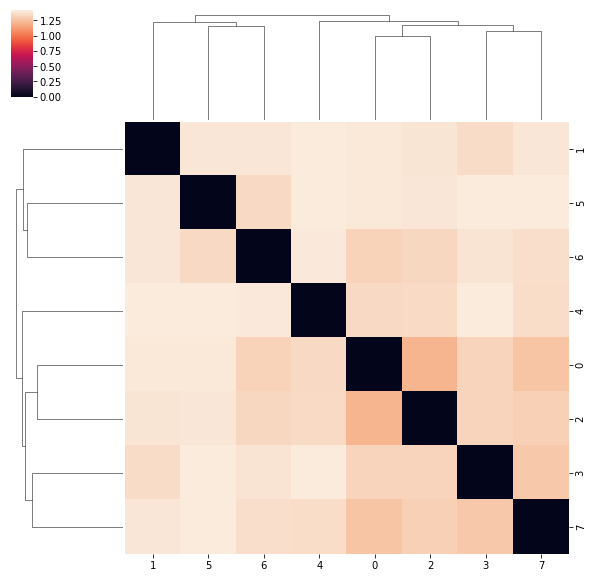

In [8]:
#1b Heatmap
g = sns.clustermap(similarity, method='ward') #, metric='correlation')
g.savefig("clustermap.pdf", bbox_inches='tight')

In [9]:
from gensim.utils import simple_preprocess
import jieba
stopwords = ['浣溪沙','满江红', '相见欢','望海潮', '金缕曲','曲玉管','水调歌头', '贺新郎','清平乐','如梦令', '采桑子','踏莎行', '虞美人','临江仙', '梦江南','诉衷情', '浪淘沙', '一剪梅', '蝶恋花', '满庭芳', '木兰花', '鹧鸪天', '青玉案', '南乡子', '生查子', '菩萨蛮', '的', '了', '和', '是', '就', '都', '而', '及', '与', '着', '或',  '是否']

In [10]:
def remove_sw(text):
    rv = []
    for doc in text:
        text1 =''
        for word in simple_preprocess(doc):
            if word not in stopwords:
                text1 += word
                text1 += ' '
        rv.append(text1)   
    return rv

In [11]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [26]:
import spacy
import zh_core_web_sm
nlp = zh_core_web_sm.load()

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list

for d in data:
    d = re.sub(r'[^\w\s\d]',' ', d) 
data_words = list(sent_to_words(data))
print(data_words[:1])


def chinese_word_cut(text):
    rv = []
    for sent in text:
        rv.append(" ".join(jieba.cut(sent)))
        
    return rv

[['金缕曲亡妇忌日有感', '此恨何时已', '滴空阶', '寒更雨歇', '葬花天气', '三载悠悠魂梦杳', '是梦久应醒矣', '料也觉', '人间无味', '不及夜台尘土隔', '冷清清', '一片埋愁地', '钗钿约', '竟抛弃', '重泉若有双鱼寄', '好知他', '年来苦乐', '与谁相倚', '我自中宵成转侧', '忍听湘弦重理', '待结个', '他生知已', '还怕两人俱薄命', '再缘悭', '剩月零风里', '清泪尽', '纸灰起', '水调歌头题西山秋爽图', '空山梵呗静', '水月影俱沈', '悠然一境人外', '都不许尘侵', '岁晚忆曾游处', '犹记半竿斜照', '一抹映疏林', '绝顶茅庵里', '老衲正孤吟', '云中锡', '溪头钓', '涧边琴', '此生著岁两屐', '谁识卧游心', '准拟乘风归去', '错向槐安回首', '何日得投簪', '布袜青鞋约', '但向画图寻', '明月棹孤舟海淀', '一片亭亭空凝伫', '趁西风霓裳偏舞', '白鸟惊飞', '菰蒲叶乱', '断续浣纱人语', '丹碧驳残秋夜雨', '风吹去采菱越女', '辘轳声断', '昏鸦欲起', '多少博山情绪', '昭君怨', '暮雨丝丝吹湿', '倦柳愁荷风急', '瘦骨不禁秋', '总成愁', '别有心情怎说', '未是诉愁时节', '谯鼓已三更', '梦须成', '沁园春', '瞬息浮生', '薄命如斯', '低徊怎忘', '记绣榻闲时', '并吹戏雨', '雕阑曲处', '同倚斜阳', '梦好难留', '诗残莫续', '赢得更深哭一场', '遗容在', '只灵飙一转', '未许端详', '重寻碧落茫茫', '料短发', '朝来定有霜', '便人间天上', '尘缘未断', '春花秋叶', '触绪还伤', '欲结绸缪', '翻惊摇落', '减尽荀衣昨日香', '真无奈', '倩声声邻笛', '谱出回肠', '百字令宿汉儿村', '无情野火', '趁西风烧遍', '天涯芳草', '榆塞重来冰雪里', '冷入鬓丝吹老', '牧马长嘶', '征笳乱动', '并入愁怀抱', '定知今夕', '庾郎瘦损多少', '便是脑满肠肥', '尚难消受', '此荒烟落照', '何况文园憔悴后', '非复酒垆风调', '回乐峰寒', '受降城远', '梦向家山

In [15]:
nonstop =remove_sw(sTexts)

In [16]:
nonstop[:100]

['金缕曲亡妇忌日有感 此恨何时已 滴空阶 寒更雨歇 葬花天气 三载悠悠魂梦杳 是梦久应醒矣 料也觉 人间无味 不及夜台尘土隔 冷清清 一片埋愁地 钗钿约 竟抛弃 重泉若有双鱼寄 好知他 年来苦乐 与谁相倚 我自中宵成转侧 忍听湘弦重理 待结个 他生知已 还怕两人俱薄命 再缘悭 剩月零风里 清泪尽 纸灰起 水调歌头题西山秋爽图 空山梵呗静 水月影俱沈 悠然一境人外 都不许尘侵 岁晚忆曾游处 犹记半竿斜照 一抹映疏林 绝顶茅庵里 老衲正孤吟 云中锡 溪头钓 涧边琴 此生著岁两屐 谁识卧游心 准拟乘风归去 错向槐安回首 何日得投簪 布袜青鞋约 但向画图寻 明月棹孤舟海淀 一片亭亭空凝伫 趁西风霓裳偏舞 白鸟惊飞 菰蒲叶乱 断续浣纱人语 丹碧驳残秋夜雨 风吹去采菱越女 辘轳声断 昏鸦欲起 多少博山情绪 昭君怨 暮雨丝丝吹湿 倦柳愁荷风急 瘦骨不禁秋 总成愁 别有心情怎说 未是诉愁时节 谯鼓已三更 梦须成 沁园春 瞬息浮生 薄命如斯 低徊怎忘 记绣榻闲时 并吹戏雨 雕阑曲处 同倚斜阳 梦好难留 诗残莫续 赢得更深哭一场 遗容在 只灵飙一转 未许端详 重寻碧落茫茫 料短发 朝来定有霜 便人间天上 尘缘未断 春花秋叶 触绪还伤 欲结绸缪 翻惊摇落 减尽荀衣昨日香 真无奈 倩声声邻笛 谱出回肠 百字令宿汉儿村 无情野火 趁西风烧遍 天涯芳草 榆塞重来冰雪里 冷入鬓丝吹老 牧马长嘶 征笳乱动 并入愁怀抱 定知今夕 庾郎瘦损多少 便是脑满肠肥 尚难消受 此荒烟落照 何况文园憔悴后 非复酒垆风调 回乐峰寒 受降城远 梦向家山绕 茫茫百感 凭高唯有清啸 金缕曲慰西溟 何事添凄咽 但由他 天公簸弄 莫教磨涅 失意每多如意少 终古几人称屈 须知道 福因才折 独卧藜床看北斗 背高城 玉笛吹成血 听谯鼓 二更彻 丈夫未肯因人热 且乘闲 五湖料理 扁舟一叶 泪似秋霖挥不尽 洒向野田黄蝶 须不羡 承明班列 马迹车尘忙未了 任西风 吹冷长安月 又萧寺 花如雪 又姜西溟言别 赋此赠之 谁复留君住 叹人生 几翻离合 便成迟暮 最忆西窗同翦烛 却话家山夜雨 不道只 暂时相聚 衮衮长江萧萧木 送遥天 白雁哀鸣去 黄叶下 秋如许 曰归因甚添愁绪 料强似 冷烟寒月 栖迟梵宇 一事伤心君落魄 两鬓飘萧未遇 有解忆 长安儿女 裘敝入门空太息 信古来 才命真相负 身世恨 共谁语 落花如梦凄迷 麝烟微 又是夕阳潜下小楼西

In [17]:
cut =[]
for sent in nonstop:
    cut.append(chinese_word_cut(sent))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0d/k2cqq0217yl4b1cg6yyg6gh80000gn/T/jieba.cache
Loading model cost 0.791 seconds.
Prefix dict has been built succesfully.


In [19]:
# Get the frequencies of the 1000 most common TF (without IDF) [=ngrams] in the corpus 
countVectorizer = TfidfVectorizer(max_features=1000, use_idf=False) # Paul limits this to 1000 ngrams, worth playing with
countMatrix2 = countVectorizer.fit_transform(nonstop)
similarity2 = euclidean_distances(countMatrix2)
linkages2 = linkage(similarity2,'ward')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


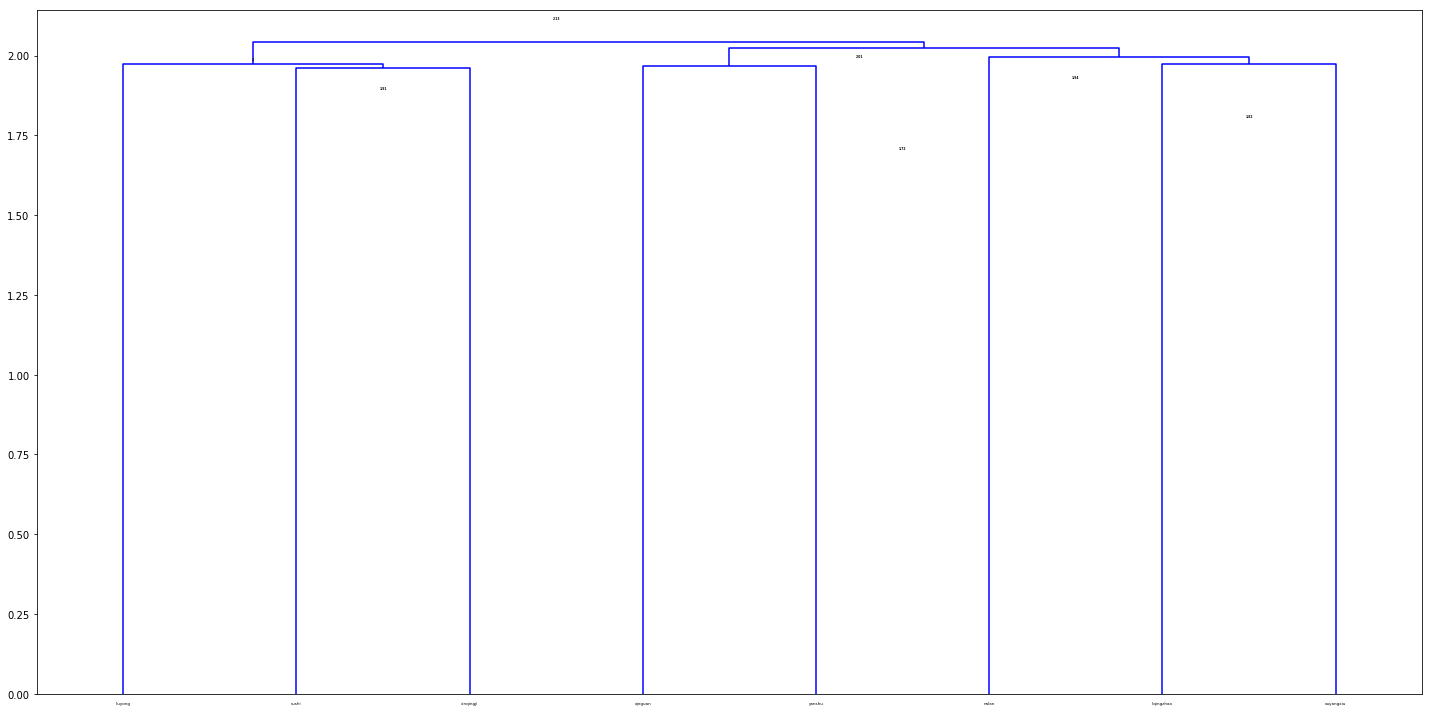

In [20]:
#1c An HCA dendrogram and clustermap for your model with all words lowercased, lemmatized, and stopwords and punctuation removed.


f = plt.figure(figsize=(20,10))

# Here we will use scipy's dendogram function (which we imported) to plot this:
dendr2 = dendrogram(linkages2, labels=sTitles, leaf_font_size=4) #orientation="right",

# We'll adjust the plot a bit to make it better
plt.tick_params(axis='x', which='both')  #, bottom=False, top=False, labelbottom=False)

# This will prevent the labels from going off the figure
plt.tight_layout()

for i, d in zip(dendr['icoord'], dendr['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y) #, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -1),
                         textcoords='offset points',
                         va='top', ha='center', fontsize=3, fontweight='bold')

plt.show()

f.savefig("dendrogram2.pdf", bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


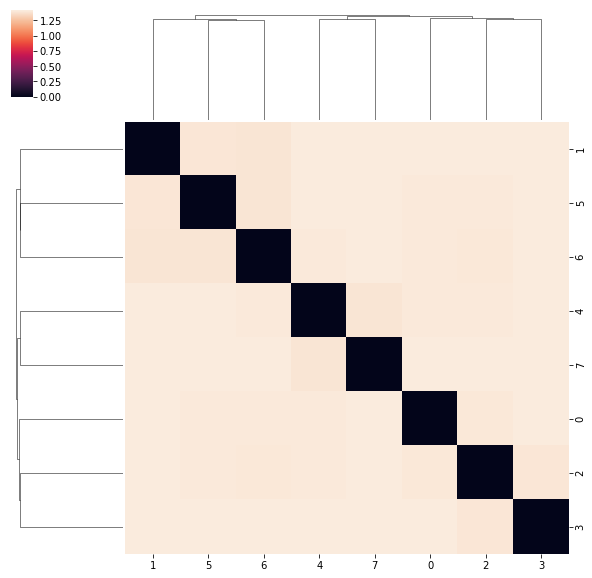

In [21]:
# Heatmap
g = sns.clustermap(similarity2, method='ward') #, metric='correlation')
g.savefig("clustermap2.pdf", bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


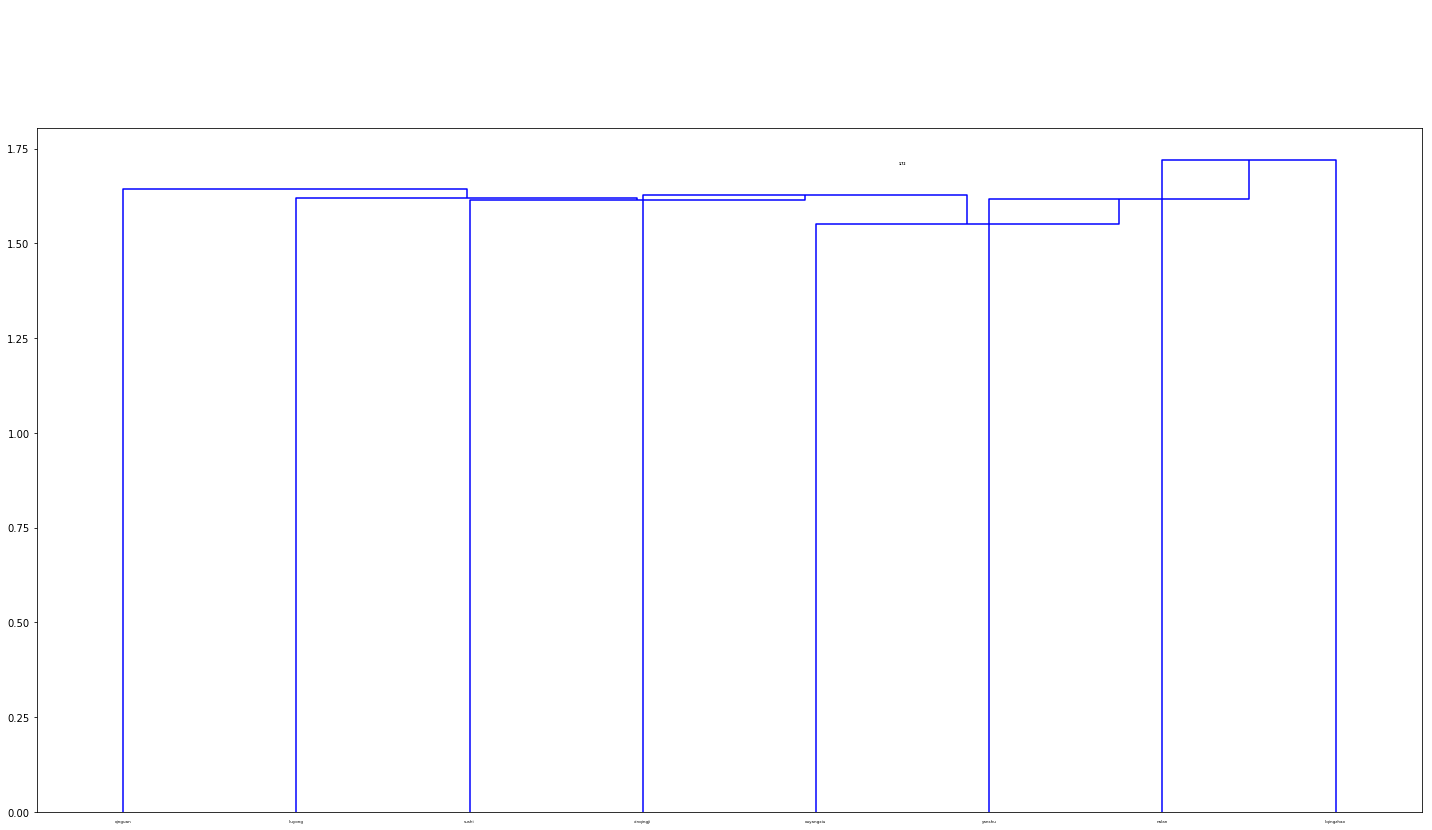

In [22]:
# 1e Provide a dendrogram and clustermap for a model other than the Ward model, I chose median here.
# 
# other HCA models, e.g. 'single', 'complete', 'weighted', and 'median'.
linkagesm = linkage(similarity, 'median')


f = plt.figure(figsize=(20,10))

# Here we will use scipy's dendogram function (which we imported) to plot this:
dendr2 = dendrogram(linkagesm, labels=sTitles, leaf_font_size=4) #orientation="right",

# We'll adjust the plot a bit to make it better
plt.tick_params(axis='x', which='both')  #, bottom=False, top=False, labelbottom=False)

# This will prevent the labels from going off the figure
plt.tight_layout()

for i, d in zip(dendr['icoord'], dendr['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y) #, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -1),
                         textcoords='offset points',
                         va='top', ha='center', fontsize=3, fontweight='bold')

plt.show()

f.savefig("dendrogramm.pdf", bbox_inches='tight')

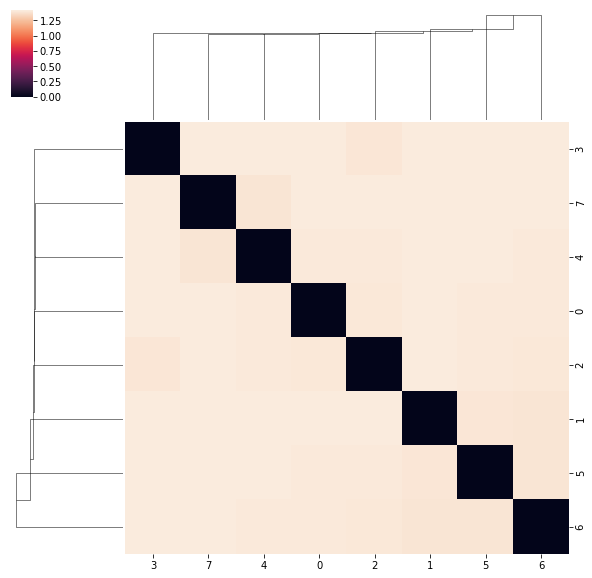

In [23]:
# Heatmap
g = sns.clustermap(similarity2, method='median') #, metric='correlation')
g.savefig("clustermap3.pdf", bbox_inches='tight')

In [29]:
# Size of n-grams:
ngrams = 2

# Limit the number of words to look at
commonWords = 500 

# Set the vocabulary you are interested in
limitVocab = False

# Vocabulary file
limitVocabularyFile = "vocab.txt"

# Types of labels for documents in the corpus
labelTypes = ('author', 'title', 'section', 'genre') # tuple with strings

# Index of label used to set Color:
colorValue = 1 # Index of label to use for color (integer). Here 1 points to "_h/c/t/x"

# Index of label to use for plot labels (if points are labeled)
labelValue = 0 # Index of label to use for labels (integer). Here 0 points to "title"

# Point size (integer)
pointSize = 5 #8

# Show point labels (add labels for each text):
pointLabels = True # True or False

# Plot loadings (write the characters tot he plot)
plotLoadings = False # True or False

# Hide points (useful for seeing loadings better):
hidePoints = False # True or False

# Output file info (dimensions are in inches (width, height)):
outputDimensions = (10, 7.5) # Tuple of integers or floats

# Output file extension determines output type. Save as a pdf if you want to edit in illustator
# PDF Output on mac is very large, but just opening and saving a copy in illustrator will fix this
outputFile = "WS_PCA.jpg"

In [28]:
# How many components?
pcaComponents = 2         # Only useful for digging even deeper in the data

# Input folder
corpusFolder = "/Users/tianchushu/Desktop/NLP/corpus/"

# Items to remove from consideration:
removeItemsFile = "/Users/tianchushu/Desktop/NLP/Stylometry/remove.txt"